In [199]:
import json, os,sys
sys.path.append('C:\\Users\\dell\\Desktop\\phasemapy')
from copy import deepcopy

from pymatgen.core import Element
from monty.json import MontyDecoder, MontyEncoder
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample
import matplotlib.pyplot as plt


In [200]:
 with open('C:\\Users\\dell\\Desktop\\phasemapy\\scripts_Cu-Fe-V-O\\samples_near_volcano.xy',encoding = "utf-8") as f:
            lines = f.readlines()

In [201]:
with open('C:\\Users\\dell\\Desktop\\phasemapy\\scripts_Cu-Fe-V-O\\PDF_Card_01-080-6417_SnO2.xy',encoding = "utf-8") as f:
            lines_sno2 = f.readlines()

In [202]:
rows = []
amps = []
for line in lines[2:-1]:
    row = line.strip().split()
    row_float = [float(x) for x in row]   
    rows.append(row_float)

   


In [204]:
rows_sno2 = []
amps_sno2 = []
for line in lines_sno2[2:-1]:
    row = line.strip().split()
    row_float = [float(x) for x in row]   
    rows_sno2.append(row_float)

In [205]:
np.array(rows_sno2).shape

(1113, 2)

In [206]:
amps_sno2 = np.array(rows_sno2).ravel(order = 'F').reshape(2,1113)

In [207]:
amps_sno2[1]

array([0.31, 0.31, 0.32, ..., 0.28, 0.27, 0.27])

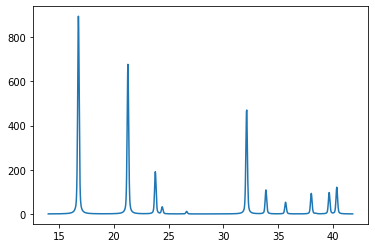

In [208]:
plt.plot(amps_sno2[0],amps_sno2[1],label='SnO2')


In [209]:
amps = np.array(rows).ravel(order = 'F').reshape(10,1198)

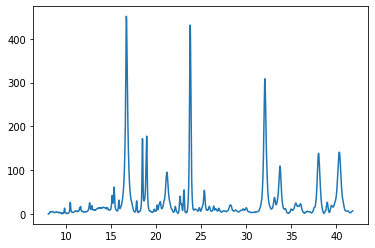

In [210]:
plt.plot(amps[0],amps[1],'-',label = str[0])

In [211]:
str = [83, 107,108,109,110,134,135,136,84,SnO2]

NameError: name 'SnO2' is not defined

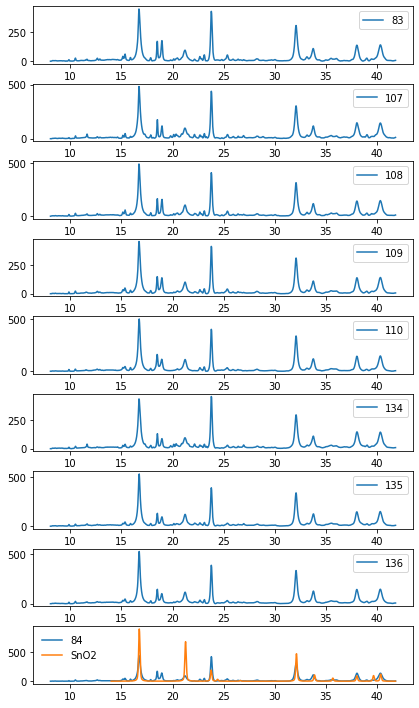

In [212]:
i = 0
fig,axes = plt.subplots(ncols=1,nrows=9,figsize=(6,len(amps)))
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.35)
for k,ax in zip(amps[1:],axes):
    ax.plot(amps[0], k,'-',label=str[i])    
    i+=1
    ax.legend()
ax.plot(amps_sno2[0],amps_sno2[1],label='SnO2')
ax.legend(loc='upper left',frameon=False,edgecolor="None")


In [213]:
amps = list(amps)

In [214]:
amps

[array([ 8.064317,  8.092502,  8.120687, ..., 41.74539 , 41.77358 ,
        41.80176 ]),
 array([0.  , 0.77, 0.93, ..., 5.85, 6.34, 6.95]),
 array([ 0.  ,  0.  ,  0.  , ...,  9.32, 10.94, 11.95]),
 array([ 0.  ,  0.73,  1.57, ..., 10.03, 10.7 , 11.29]),
 array([0.  , 0.  , 0.  , ..., 6.4 , 6.56, 6.55]),
 array([0.  , 0.  , 0.  , ..., 3.82, 4.25, 4.7 ]),
 array([0.  , 0.  , 0.  , ..., 9.68, 9.17, 9.38]),
 array([0.  , 0.  , 0.91, ..., 6.64, 7.74, 8.8 ]),
 array([0.  , 0.  , 0.  , ..., 6.2 , 6.9 , 6.88]),
 array([0.  , 0.  , 0.  , ..., 3.76, 3.84, 3.65])]

In [215]:
amps.append(amps_sno2[0])

In [216]:
amps

[array([ 8.064317,  8.092502,  8.120687, ..., 41.74539 , 41.77358 ,
        41.80176 ]),
 array([0.  , 0.77, 0.93, ..., 5.85, 6.34, 6.95]),
 array([ 0.  ,  0.  ,  0.  , ...,  9.32, 10.94, 11.95]),
 array([ 0.  ,  0.73,  1.57, ..., 10.03, 10.7 , 11.29]),
 array([0.  , 0.  , 0.  , ..., 6.4 , 6.56, 6.55]),
 array([0.  , 0.  , 0.  , ..., 3.82, 4.25, 4.7 ]),
 array([0.  , 0.  , 0.  , ..., 9.68, 9.17, 9.38]),
 array([0.  , 0.  , 0.91, ..., 6.64, 7.74, 8.8 ]),
 array([0.  , 0.  , 0.  , ..., 6.2 , 6.9 , 6.88]),
 array([0.  , 0.  , 0.  , ..., 3.76, 3.84, 3.65]),
 array([14.   , 14.025, 14.05 , ..., 41.75 , 41.775, 41.8  ])]

In [217]:
amps.append(amps_sno2[1])

In [218]:
amps

[array([ 8.064317,  8.092502,  8.120687, ..., 41.74539 , 41.77358 ,
        41.80176 ]),
 array([0.  , 0.77, 0.93, ..., 5.85, 6.34, 6.95]),
 array([ 0.  ,  0.  ,  0.  , ...,  9.32, 10.94, 11.95]),
 array([ 0.  ,  0.73,  1.57, ..., 10.03, 10.7 , 11.29]),
 array([0.  , 0.  , 0.  , ..., 6.4 , 6.56, 6.55]),
 array([0.  , 0.  , 0.  , ..., 3.82, 4.25, 4.7 ]),
 array([0.  , 0.  , 0.  , ..., 9.68, 9.17, 9.38]),
 array([0.  , 0.  , 0.91, ..., 6.64, 7.74, 8.8 ]),
 array([0.  , 0.  , 0.  , ..., 6.2 , 6.9 , 6.88]),
 array([0.  , 0.  , 0.  , ..., 3.76, 3.84, 3.65]),
 array([14.   , 14.025, 14.05 , ..., 41.75 , 41.775, 41.8  ]),
 array([0.31, 0.31, 0.32, ..., 0.28, 0.27, 0.27])]

In [219]:
amps=np.array(amps)
np.save('amps_9sample_sno2.npy',amps) #保存为npy格式

C:\Users\dell\anaconda3\envs\myPymatgen\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [7]:
import os
for i in [83]: #range(instance_data.sample_num):
    solution_file = f'solution/samples{i}.json'
    if True:        
        continue
        with open(solution_file) as f:
            sample = json.load(f, cls=MontyDecoder)
        continue
    else:
        print(f'Solving sample {i} ......')

2
